In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
caminho_do_arquivo = r"C:\Users\tperez\Desktop\Thiago\TCC Thiago\Copía original TCC.xlsx"
nome_da_aba = '230719061222VENDAS'


In [4]:
try:
    # CORREÇÃO: Usar o parâmetro 'sheet_name=' e a variável 'nome_da_aba'
    df = pd.read_excel(caminho_do_arquivo, sheet_name=nome_da_aba)
    
    print(f"Aba '{nome_da_aba}' carregada com sucesso!")
    print(df.head())

except Exception as e:
    print(f"Ocorreu um erro: {e}")

Aba '230719061222VENDAS' carregada com sucesso!
  dt_faturamento sistema_orig codigo_externo produto dt_emissao cia_forn  \
0     2022-10-25       RAVWEB            NaN     RAV 2022-01-01      RAV   
1     2022-08-01     Cons TRH            NaN     FEE 2022-01-01      RAV   
2     2022-06-21     Cons TRH            NaN     NaN 2022-01-01       G3   
3     2022-06-21     Cons TRH            NaN     NaN 2022-01-01       G3   
4     2022-06-21     Cons TRH            NaN     NaN 2022-01-01       G3   

   for_codigo  bilhete loc_cia tourcode  ... cli_grupo  forma_pgto dt_inicio  \
0     37087.8       99   zerep      RAV  ...      AC             3       NaT   
1     37087.8       99   zerep      NaN  ...                     1       NaT   
2     10104.4       99   zerep      NaN  ...      GF             1       NaT   
3     10104.4       99   zerep      NaN  ...      GF             1       NaT   
4     10104.4       99   zerep      NaN  ...      GF             1       NaT   

  fatura_cli d

In [5]:
df.head()

,dt_faturamento,sistema_orig,codigo_externo,produto,dt_emissao,cia_forn,for_codigo,bilhete,loc_cia,tourcode,...,cli_grupo,forma_pgto,dt_inicio,fatura_cli,dt_termino,usr_faturamento,usr_inclusao,ts_alteracao,forma_pgto_cli,bas_tarifaria
0,2022-10-25,RAVWEB,NaN,RAV,2022-01-01,RAV,37087.8,99,zerep,RAV,...,AC,3,NaT,363877,NaT,boot.stf,boot.stf,2022-10-26 14:32:04.463412,CCred+Sinal+Saldo,RAV
1,2022-08-01,Cons TRH,NaN,FEE,2022-01-01,RAV,37087.8,99,zerep,NaN,...,,1,NaT,62157,NaT,adri.cpq,boot.stf,2022-08-01 09:55:26.310481,Fat+Saldo,RAV
2,2022-06-21,Cons TRH,NaN,NaN,2022-01-01,G3,10104.4,99,zerep,NaN,...,GF,1,NaT,324174,NaT,internet,boot.stf,2022-08-04 08:54:08.959236,Fat+Saldo,G3
3,2022-06-21,Cons TRH,NaN,NaN,2022-01-01,G3,10104.4,99,zerep,NaN,...,GF,1,NaT,324174,NaT,internet,boot.stf,2022-08-04 08:54:08.959236,Fat+Saldo,G3
4,2022-06-21,Cons TRH,NaN,NaN,2022-01-01,G3,10104.4,99,zerep,NaN,...,GF,1,NaT,324174,NaT,internet,boot.stf,2022-08-04 08:54:08.959236,Fat+Saldo,G3


#Tratamento de Dados

In [6]:
df['dt_faturamento'] = pd.to_datetime(df['dt_faturamento'], errors='coerce')
df['dt_emissao'] = pd.to_datetime(df['dt_emissao'], errors='coerce')

In [7]:
df['ano'] = df['dt_faturamento'].dt.year
df['mes'] = df['dt_faturamento'].dt.month
df['dia_semana'] = df['dt_faturamento'].dt.dayofweek

In [8]:
variaveis_financeiras = ['cli_tarifa','cli_taxas','vlr_fee_cli','vlr_comis_cli','vlr_saldo_cli']
df[variaveis_financeiras] = df[variaveis_financeiras].fillna(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 45 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   dt_faturamento   1044018 non-null  datetime64[ns]
 1   sistema_orig     1048575 non-null  object        
 2   codigo_externo   800157 non-null   object        
 3   produto          98187 non-null    object        
 4   dt_emissao       1048575 non-null  datetime64[ns]
 5   cia_forn         1048575 non-null  object        
 6   for_codigo       1048575 non-null  float64       
 7   bilhete          1048575 non-null  int64         
 8   loc_cia          1048575 non-null  object        
 9   tourcode         258716 non-null   object        
 10  processo         1048575 non-null  object        
 11  cliente          1048575 non-null  float64       
 12  cli_nome         1048575 non-null  object        
 13  nome_pax         1048270 non-null  object        
 14  ro

In [10]:
variaveis_financeiras = ['cli_tarifa','cli_taxas','vlr_fee_cli','vlr_comis_cli','vlr_saldo_cli']

In [11]:
medidas_resumo = df[variaveis_financeiras].describe().T
medidas_resumo['mediana'] = df[variaveis_financeiras].median()
medidas_resumo

,count,mean,std,min,25%,50%,75%,max,mediana
cli_tarifa,1048575.0,1396.879294,3452.005437,0.00,318.72,701.06,1459.90,1386327.77,701.06
cli_taxas,1048575.0,136.038591,369.377786,-3506.32,35.52,48.23,79.86,73226.26,48.23
vlr_fee_cli,1048575.0,9.613486,137.635018,0.00,0.00,0.00,0.00,77308.72,0.00
vlr_comis_cli,1048575.0,33.636661,182.556921,-64.28,0.00,0.00,0.00,74293.68,0.00
vlr_saldo_cli,1048575.0,748.403099,1909.727082,-74293.68,0.00,366.95,912.10,367768.00,366.95


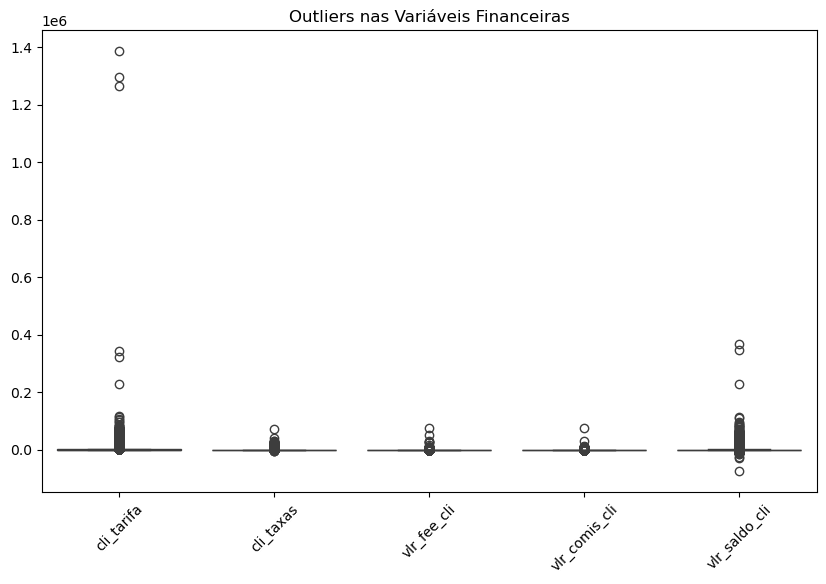

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[variaveis_financeiras])
plt.title("Outliers nas Variáveis Financeiras")
plt.xticks(rotation=45)
plt.show()

Variáveis Qualitativas

In [13]:
variaveis_qualitativas = ['cia_forn','rota','produto','cli_grupo']

In [14]:
for var in variaveis_qualitativas:
  print(f"\n-- {var} --")
  print(df[var].value_counts(normalize=True).head(10)*100)


-- cia_forn --
cia_forn
JJ     33.819231
G3     28.363636
AD     23.499130
RAV     3.280834
TP      1.670362
AA      0.999452
CM      0.914861
UA      0.820638
AR      0.693036
AF      0.605870
Name: proportion, dtype: float64

-- rota --
rota
GRU/SDU        8.024882
CGH/SDU        2.242974
CGH/SDU/CGH    0.704918
SDU/CGH/SDU    0.674596
GRU/REC        0.444629
REC/GRU        0.437794
SDU/CGH        0.422874
CGH/SSA        0.409494
SSA/CGH        0.379845
POA/CGH/POA    0.368872
Name: proportion, dtype: float64

-- produto --
produto
ETKT       41.746871
RAV        27.159400
EMD        21.532382
FEE         2.823184
ETICKET     2.255899
WEX         1.596953
GRUPOS      1.149847
ADM         0.611079
CHA         0.187398
CHT         0.141567
Name: proportion, dtype: float64

-- cli_grupo --
cli_grupo
AC      46.037909
        34.008821
FF      12.304985
CD       2.465823
GF       2.329638
OT       1.400091
EO       0.948144
VF       0.282002
NC       0.092220
4C       0.042534
Name: pro

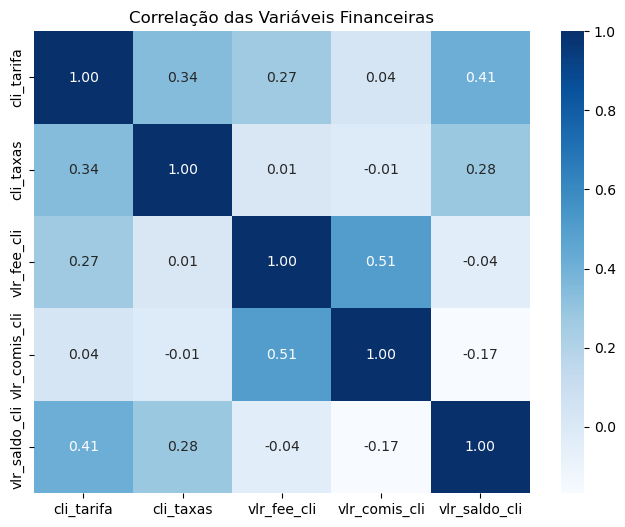

In [15]:
plt.figure(figsize=(8,6))
corr = df[variaveis_financeiras].corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlação das Variáveis Financeiras")
plt.show()

In [16]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
serie = df.groupby('dt_faturamento')['cli_tarifa'].mean().dropna()

In [18]:
tamanho_treino = int(len(serie)*0.8)
train, test = serie[:tamanho_treino], serie[tamanho_treino:]

In [19]:
print(f"Treino: {train.index.min()} até {train.index.max()}  ({len(train)} registros)")
print(f"Teste: {test.index.min()} até {test.index.max()}  ({len(test)} registros)")

Treino: 2022-01-07 00:00:00 até 2022-10-06 00:00:00  (236 registros)
Teste: 2022-10-07 00:00:00 até 2023-06-19 00:00:00  (60 registros)


In [20]:
modelo = ARIMA(train, order=(1,1,1))
fit = modelo.fit()

C:\Users\tperez\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\tperez\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\tperez\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [21]:
forecast = fit.forecast(steps=len(test))

C:\Users\tperez\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\tperez\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [22]:
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)

In [23]:
forecast.index = test.index

mask = test != 0
mape = np.mean(np.abs((test[mask] - forecast[mask]) / test[mask])) * 100

print("\n ARIMA – Avaliação")
print(f"MSE : {mse:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAE : {mae:,.2f}")
print(f"MAPE: {mape:,.2f}%")


 ARIMA – Avaliação
MSE : 18,882,268.07
RMSE: 4,345.37
MAE : 2,150.63
MAPE: 174.09%


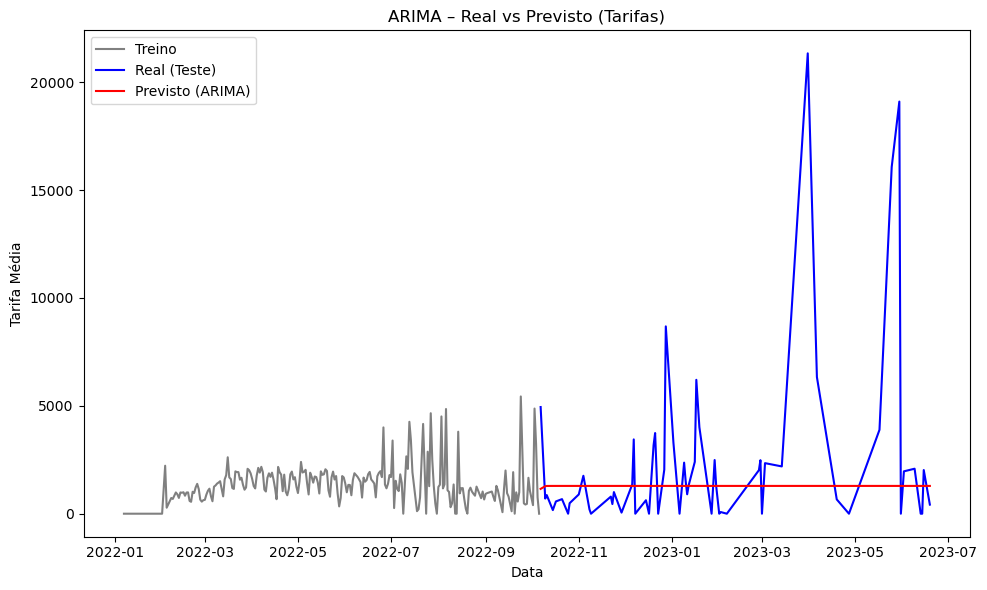

In [24]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label="Treino", color="gray")
plt.plot(test.index, test, label="Real (Teste)", color="blue")
plt.plot(test.index, forecast, label="Previsto (ARIMA)", color="red")
plt.title("ARIMA – Real vs Previsto (Tarifas)")
plt.xlabel("Data")
plt.ylabel("Tarifa Média")
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
TIFFANY = '#64C3B5'
MARINHO = '#0B9F5B'

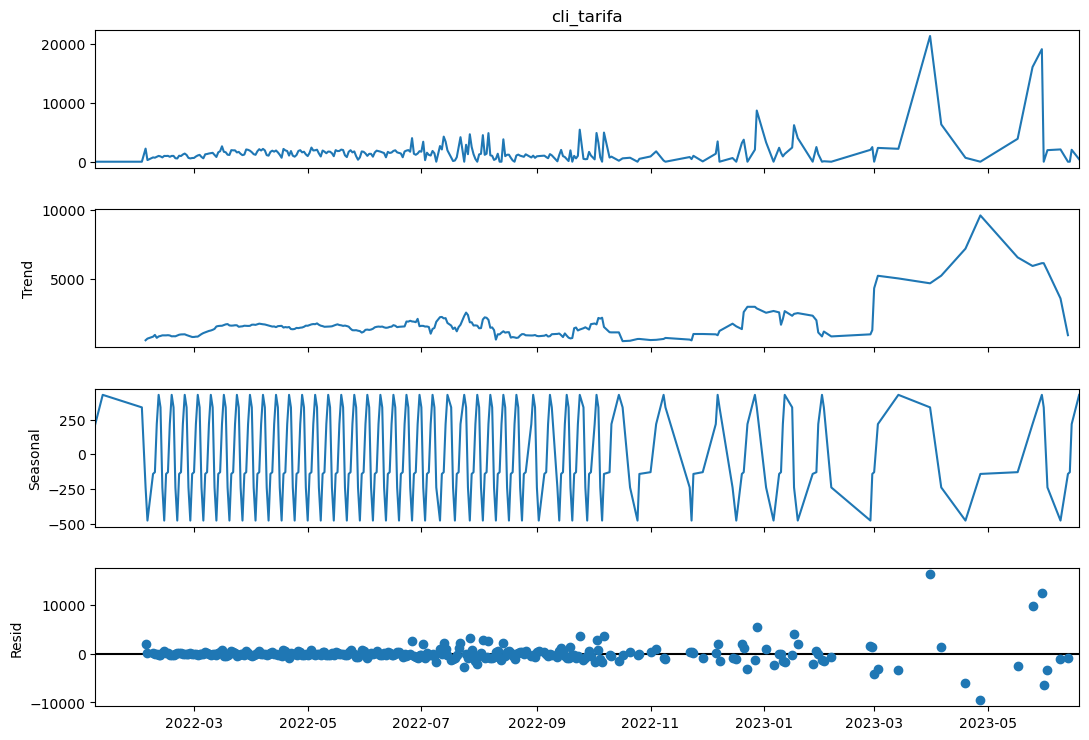

In [27]:
decomp = seasonal_decompose(serie, model='additive', period=7)

fig = decomp.plot()
fig.set_size_inches(12, 8)

Random Forest Regressor (IA)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
df_rf = df.copy()

In [30]:
df_rf['dt_faturamento'] = pd.to_datetime(df_rf['dt_faturamento'], errors='coerce')

In [31]:
df_rf['mes'] = df_rf['dt_faturamento'].dt.month
df_rf['dia_semana'] = df_rf['dt_faturamento'].dt.weekday

In [32]:
def agrupar_categorias(col, limite=0.02):  # 2% como limite
    freq = col.value_counts(normalize=True)
    categorias_raras = freq[freq < limite].index
    return col.apply(lambda x: 'OUTROS' if x in categorias_raras else x)

df_rf['cia_forn'] = agrupar_categorias(df_rf['cia_forn'])
df_rf['rota'] = agrupar_categorias(df_rf['rota'])
df_rf['produto'] = agrupar_categorias(df_rf['produto'])
df_rf['cli_grupo'] = agrupar_categorias(df_rf['cli_grupo'])

In [33]:
y = df_rf['cli_tarifa']

X = df_rf[['cli_taxas','vlr_fee_cli','vlr_comis_cli','vlr_saldo_cli',
           'mes','dia_semana','cia_forn','rota','produto','cli_grupo']]

In [34]:
X = pd.get_dummies(X, drop_first=True)

In [35]:
mask = y.notnull()
X, y = X[mask], y[mask]

In [36]:
n_treino = int(len(X)*0.8)
X_train, X_test = X.iloc[:n_treino], X.iloc[n_treino:]
y_train, y_test = y.iloc[:n_treino], y.iloc[n_treino:]

In [37]:
print(f"Treino: {len(X_train)} registros | Teste: {len(X_test)} registros")

Treino: 838860 registros | Teste: 209715 registros


In [38]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=300, n_jobs=-1,
                      random_state=42)

In [39]:
pred = rf.predict(X_test)

mse  = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, pred)
mask = y_test != 0
mape = np.mean(np.abs((y_test[mask] - pred[mask]) / y_test[mask])) * 100

print("\n Random Forest – Avaliação no Teste")
print(f"MSE : {mse:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAE : {mae:,.2f}")
print(f"MAPE: {mape:,.2f}%")


 Random Forest – Avaliação no Teste
MSE : 3,616,243.62
RMSE: 1,901.64
MAE : 241.59
MAPE: 19.50%


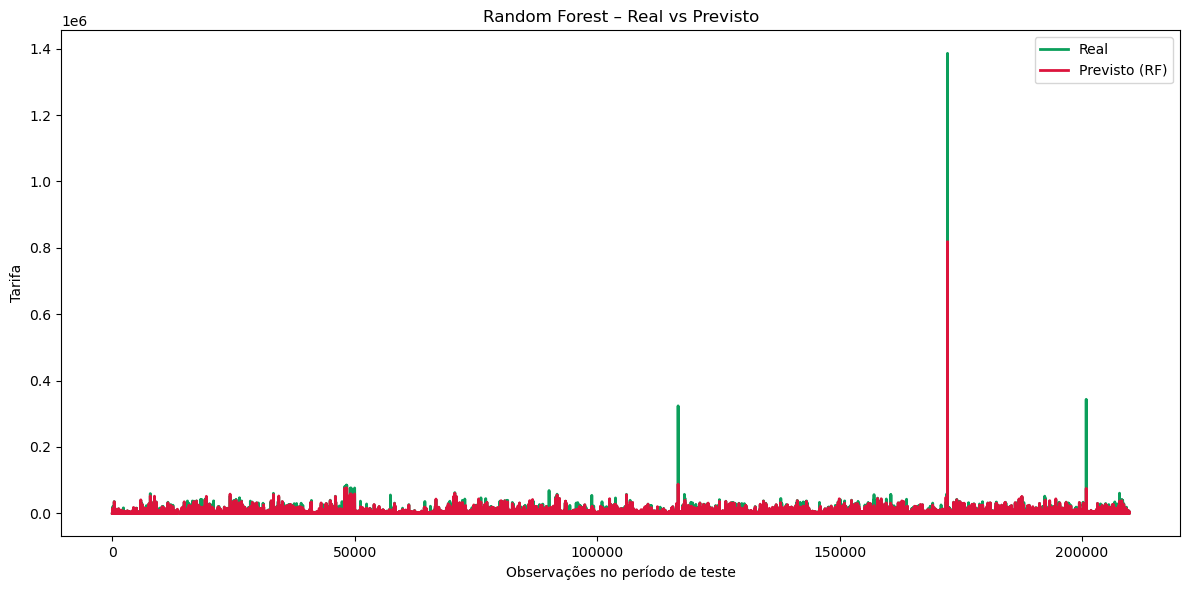

In [40]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Real", color=MARINHO, linewidth=2)
plt.plot(pred, label="Previsto (RF)", color='crimson', linewidth=2)
plt.title("Random Forest – Real vs Previsto")
plt.xlabel("Observações no período de teste")
plt.ylabel("Tarifa")
plt.legend()
plt.tight_layout()
plt.show()

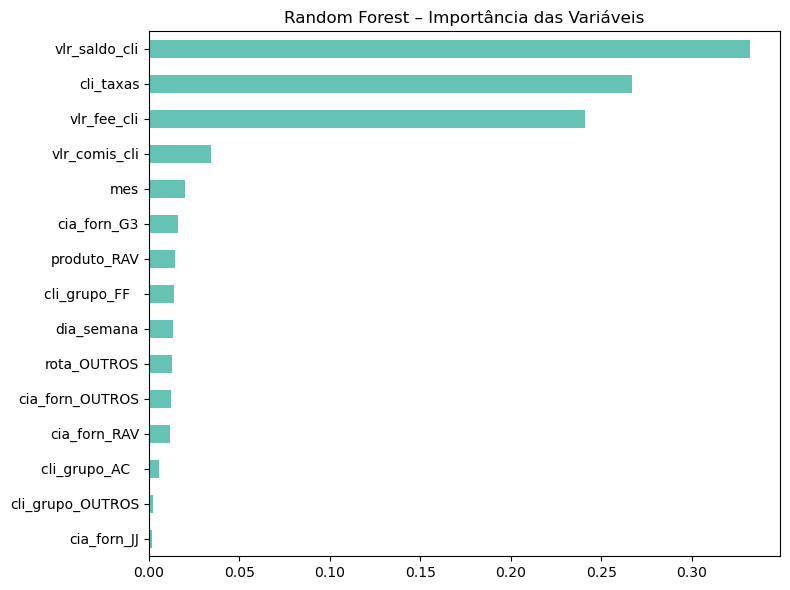

In [41]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8,6))
importances.tail(15).plot(kind='barh', color=TIFFANY)
plt.title("Random Forest – Importância das Variáveis")
plt.tight_layout()
plt.show()

In [42]:
TIFFANY = '#64C3B5'   # barras ARIMA
MARINHO = '#0B9F5B'   # barras RF

# === Métricas (substitua se recalcular) ===
metrics = {
    "ARIMA": {
        "MSE": 18882268.07,
        "RMSE": 4345.37,
        "MAE": 2150.63,
        "MAPE": np.nan  # se tiver tratado, preencha
    },
    "Random Forest": {
        "MSE": 3616243.62,
        "RMSE": 1901.64,
        "MAE": 241.59,
        "MAPE": 19.50
    }
}

dfm = pd.DataFrame(metrics).T[["MSE","RMSE","MAE","MAPE"]]
dfm

,MSE,RMSE,MAE,MAPE
ARIMA,18882268.07,4345.37,2150.63,NaN
Random Forest,3616243.62,1901.64,241.59,19.5


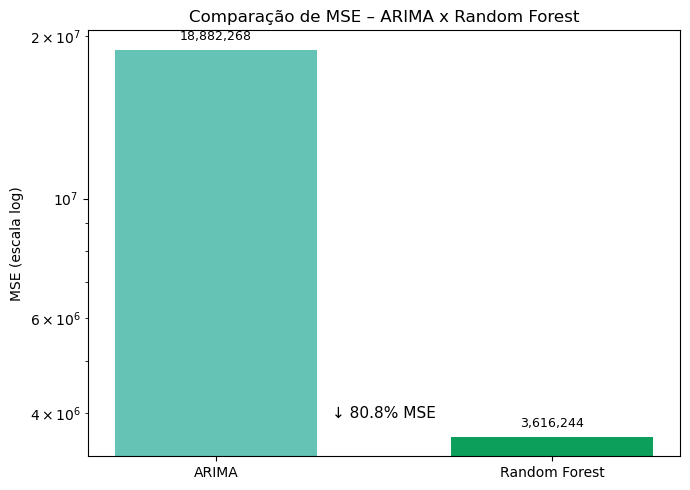

In [43]:
from pathlib import Path

Path("outputs_tcc").mkdir(exist_ok=True)

fig, ax = plt.subplots(figsize=(7,5))
x = np.arange(2)
width = 0.6

vals = [dfm.loc["ARIMA","MSE"], dfm.loc["Random Forest","MSE"]]
bars = ax.bar(x, vals, width=width, color=[TIFFANY, MARINHO])
ax.set_yscale('log')
ax.set_xticks(x, ["ARIMA","Random Forest"])
ax.set_ylabel("MSE (escala log)")
ax.set_title("Comparação de MSE – ARIMA x Random Forest")

# anotações
for b in bars:
    ax.annotate(f'{b.get_height():,.0f}',
                xy=(b.get_x()+b.get_width()/2, b.get_height()),
                xytext=(0,5), textcoords='offset points',
                ha='center', va='bottom', fontsize=9)

# % de melhora do RF vs ARIMA
improv = 100*(1 - dfm.loc["Random Forest","MSE"]/dfm.loc["ARIMA","MSE"])
ax.text(0.5, 0.1, f"↓ {improv:.1f}% MSE", transform=ax.transAxes,
        ha='center', va='center', fontsize=11, bbox=dict(facecolor='white', alpha=.6, edgecolor='none'))

plt.tight_layout()
plt.savefig("outputs_tcc/comp_MSE_arima_vs_rf.png", dpi=150)
plt.show()


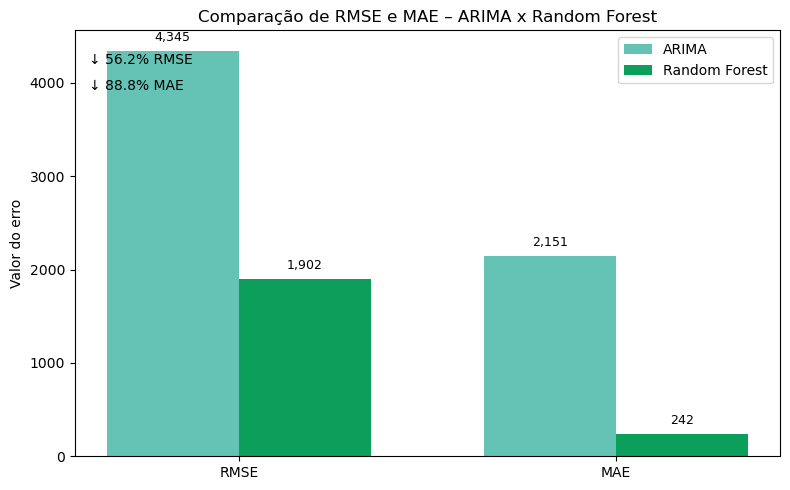

In [44]:
fig, ax = plt.subplots(figsize=(8,5))
metrics_to_plot = ["RMSE","MAE"]
x = np.arange(len(metrics_to_plot))
width = 0.35

arima_vals = dfm.loc["ARIMA", metrics_to_plot].values
rf_vals    = dfm.loc["Random Forest", metrics_to_plot].values

b1 = ax.bar(x - width/2, arima_vals, width, label='ARIMA', color=TIFFANY)
b2 = ax.bar(x + width/2, rf_vals,    width, label='Random Forest', color=MARINHO)

ax.set_xticks(x, metrics_to_plot)
ax.set_ylabel("Valor do erro")
ax.set_title("Comparação de RMSE e MAE – ARIMA x Random Forest")
ax.legend()


for bars in [b1, b2]:
    for b in bars:
        ax.annotate(f'{b.get_height():,.0f}',
                    xy=(b.get_x()+b.get_width()/2, b.get_height()),
                    xytext=(0,5), textcoords='offset points',
                    ha='center', va='bottom', fontsize=9)

rmse_improv = 100*(1 - dfm.loc["Random Forest","RMSE"]/dfm.loc["ARIMA","RMSE"])
mae_improv  = 100*(1 - dfm.loc["Random Forest","MAE"]/dfm.loc["ARIMA","MAE"])
ax.text(0.02, 0.92, f"↓ {rmse_improv:.1f}% RMSE", transform=ax.transAxes, fontsize=10)
ax.text(0.02, 0.86, f"↓ {mae_improv:.1f}% MAE",  transform=ax.transAxes, fontsize=10)

plt.tight_layout()
plt.savefig("outputs_tcc/comp_RMSE_MAE_arima_vs_rf.png", dpi=150)
plt.show()

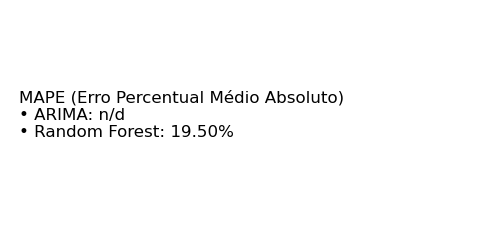

In [45]:
fig, ax = plt.subplots(figsize=(5,2.4))
ax.axis('off')

mape_arima = dfm.loc["ARIMA","MAPE"]
mape_rf    = dfm.loc["Random Forest","MAPE"]

txt =  "MAPE (Erro Percentual Médio Absoluto)\n"
txt += f"• ARIMA: {'n/d' if pd.isna(mape_arima) else f'{mape_arima:.2f}%'}\n"
txt += f"• Random Forest: {mape_rf:.2f}%"

ax.text(0.02, 0.5, txt, fontsize=12, va='center')
plt.tight_layout()
plt.savefig("outputs_tcc/card_MAPE.png", dpi=150)
plt.show()